<a href="https://colab.research.google.com/github/albaraa-prog/FaceMack-CNN-ML/blob/main/FaceMaskNoMask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# The Dataset is in my Google Drive, therefore I will import it.
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [5]:
# Set the path for the dataset
train_dir = '/content/drive/MyDrive/Mask_NoMask'
test_dir = '/content/drive/MyDrive/Dataset_Test'

In [12]:
# Making sure all dataset are imported to the project
import os
print(len(os.listdir('/content/drive/MyDrive/Mask_NoMask/with_mask')))
print(len(os.listdir('/content/drive/MyDrive/Mask_NoMask/without_mask')))
print(len(os.listdir('/content/drive/MyDrive/Dataset_Test/with_mask')))
print(len(os.listdir('/content/drive/MyDrive/Dataset_Test/without_mask')))

2994
2994
500
500


In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Split 20% of the images for validation
)

# Load and prepare training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=100,
    class_mode='binary',  # 'binary' for binary classification (Mask vs. No Mask)
    subset='training'  # Specify 'training' for the training set
)

# Create ImageDataGenerator for validation set
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Note: Using the same validation split as in the training set
)

# Load and prepare validation data
validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Specify 'validation' for the validation set
)

Found 4792 images belonging to 2 classes.
Found 1196 images belonging to 2 classes.


In [19]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,UpSampling2D, Dropout

In [20]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) #feature reduction
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))  #output layer

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy']) #binary_crossentropy - binary classification

In [14]:
history = model.fit(train_data, epochs=20, validation_data=validation_data)

Epoch 1/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1080s 21s/step - accuracy: 0.7211 - loss: 0.6562 - val_accuracy: 0.9674 - val_loss: 0.0999
Epoch 2/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 900s 19s/step - accuracy: 0.9663 - loss: 0.0927 - val_accuracy: 0.9758 - val_loss: 0.0868
Epoch 3/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 941s 19s/step - accuracy: 0.9758 - loss: 0.0814 - val_accuracy: 0.9866 - val_loss: 0.0586
Epoch 4/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 913s 19s/step - accuracy: 0.9777 - loss: 0.0566 - val_accuracy: 0.9766 - val_loss: 0.0787
Epoch 5/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 920s 19s/step - accuracy: 0.9826 - loss: 0.0509 - val_accuracy: 0.9824 - val_loss: 0.0595
Epoch 6/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 914s 19s/step - accuracy: 0.9888 - loss: 0.0309 - val_accuracy: 0.9875 - val_loss: 0.0513
Epoch 7/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 919s 19s/step - accuracy: 0.9933 - loss: 0.0210 - val_accuracy: 0.9791 - val_loss: 0.0612
Epoch 8/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 899s 18s/step - accuracy: 0.9921 - loss: 0.0204 - val_accuracy: 0

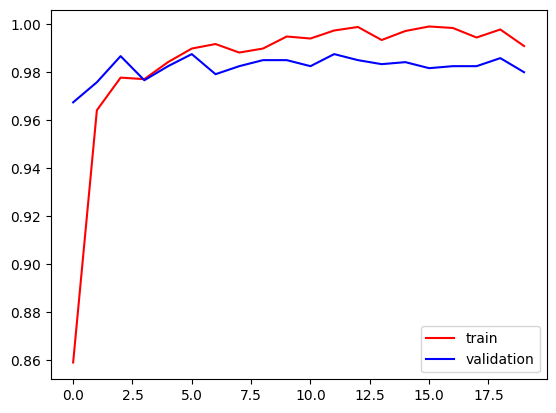

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

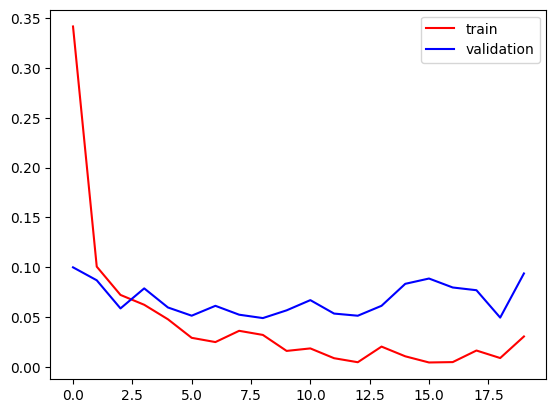

In [16]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [15]:
# Test dataset
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,  # Separate directory for testing images
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    shuffle=False  # To not shuffle to align with ground truth order
)


Found 1000 images belonging to 2 classes.


In [18]:
#predict the test data
predictions = model.predict(test_data)

32/32 ━━━━━━━━━━━━━━━━━━━━ 129s 4s/step


In [19]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report after applying techniques to handle overfitting:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[485  15]
 [  3 497]]
Classification Report after applying techniques to handle overfitting:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       500
           1       0.97      0.99      0.98       500

    accuracy                           0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000



### **Using Pre-trained model - Resnet**

In [3]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

# Load ResNet50 without the top layer (for custom input shape)
pretrained_model = tf.keras.applications.ResNet50(include_top=False,
                                                  input_shape=(256, 256, 3),
                                                  pooling='max',
                                                  weights='imagenet')

# Freeze all layers of the ResNet50 model
for layer in pretrained_model.layers:
    layer.trainable = False

# Build the new model on top
resnet_model = Sequential([
    pretrained_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [9]:
from tensorflow.keras.optimizers import Adam
resnet_model.compile(optimizer=Adam(learning_rate=0.001),
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

In [10]:
# Train the model with increased batch size and reduced epochs
history = resnet_model.fit(train_data,
                           epochs=10,  # Reduced number of epochs
                           validation_data=validation_data,
                           batch_size=100)  # Increased batch size for better parallelization

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


48/48 ━━━━━━━━━━━━━━━━━━━━ 1686s 33s/step - accuracy: 0.5066 - loss: 2.4865 - val_accuracy: 0.7667 - val_loss: 0.5700
Epoch 2/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 1606s 33s/step - accuracy: 0.6468 - loss: 0.6001 - val_accuracy: 0.7952 - val_loss: 0.4989
Epoch 3/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 1565s 33s/step - accuracy: 0.7580 - loss: 0.5137 - val_accuracy: 0.8353 - val_loss: 0.4429
Epoch 4/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 1575s 33s/step - accuracy: 0.8254 - loss: 0.4360 - val_accuracy: 0.8035 - val_loss: 0.4432
Epoch 5/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 1548s 32s/step - accuracy: 0.8252 - loss: 0.4133 - val_accuracy: 0.8771 - val_loss: 0.3551
Epoch 6/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 1561s 33s/step - accuracy: 0.8758 - loss: 0.3531 - val_accuracy: 0.8888 - val_loss: 0.3282
Epoch 7/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 1585s 33s/step - accuracy: 0.8854 - loss: 0.3239 - val_accuracy: 0.7943 - val_loss: 0.4535
Epoch 8/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 1562s 32s/step - accuracy: 0.7876 - loss: 0.4343 - val_accuracy: 0.704

In [16]:
predictions = resnet_model.predict(test_data)

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


32/32 ━━━━━━━━━━━━━━━━━━━━ 277s 8s/step


In [17]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report after applying techniques to handle overfitting:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[410  90]
 [  9 491]]
Classification Report after applying techniques to handle overfitting:
              precision    recall  f1-score   support

           0       0.98      0.82      0.89       500
           1       0.85      0.98      0.91       500

    accuracy                           0.90      1000
   macro avg       0.91      0.90      0.90      1000
weighted avg       0.91      0.90      0.90      1000

